## Parte 1 - Instalando e importando bibliotecas que serão utilizadas

executar os códigos no terminal!

<code>conda create --yes --name workshop1 python=3.7</code>

<code>conda activate workshop1</code>

<code>conda install jupyterlab=2.2.6</code>

<code>conda install -c conda-forge pyproj=2.4.2.post1</code>

<code>conda install -c conda-forge descartes=1.1.0</code>

<code>conda install -c conda-forge geopandas=0.8.1</code>

<code>conda install -c conda-forge geopy=2.0.0</code>

<code>conda install pandas</code>

<code>conda install numpy</code>

<code>conda install matplotlib</code>

In [1]:
# importando bibliotecas que serao utilizadas
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
import pyproj
import shapely.wkt
import seaborn as sns
import geopy.distance
from shapely.geometry import Point
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Parte 2 - Importando as informações do DataSet proposta para o projeto

In [2]:
# lendo o conjunto de dados
df = pd.read_csv('Real_State_Properati.csv', sep = '\t')
df_original = df.copy()

## Parte 3 - Entender o que cada coluna significa.

property_type : Tipo de propriedade.

place_name : Nome do bairro.

country_name : Nome do pais.

state_name: Localidade da propriedade.

lat : Latitude

lon : Longitude

price : Preco publicado na propaganda.

currency : tipo de moeda utilizada no anuncio.

surface_total_in_m2 : metragem da area do imovel.

## Parte 3 - Entender o que cada coluna significa.

Tipo de propriedade.
Nome do bairro.
Nome do pais.
Localização da propriedade.
Latitude
Longitude
Preço publicado na propaganda.
tipo de moeda utilizada no anuncio.
metragem da area do imovel.

In [182]:
# checando as primeiras linhas do conjunto
df.head()

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0
1,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,55.0
2,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,138000.0,USD,45.0
3,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,195000.0,USD,65.0
4,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0


## Após avaliar como os dados estão distribuídos no dataset, nota-se que não existem valores nulos.

In [183]:
# informação das colunas para ver se existem campos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17223 entries, 0 to 17222
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        17223 non-null  object 
 1   place_name           17223 non-null  object 
 2   country_name         17223 non-null  object 
 3   state_name           17223 non-null  object 
 4   lat                  17223 non-null  float64
 5   lon                  17223 non-null  float64
 6   price                17223 non-null  float64
 7   currency             17223 non-null  object 
 8   surface_total_in_m2  17223 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.2+ MB


## Convertendo os valores de habitação que estão precificados em Peso Argentino para Dólares dos EUA
Após avaliação inicial nota-se que grande parte das informações estão precificadas em USD

In [3]:
# convertendo preços com moeda ARS para USD

#1 ARS =  0.0085 USD

df['price_ajustado'] = df['price']

df['currency_ajustado'] = df['currency']

df.loc[df['currency']=='ARS', 'price_ajustado'] = df['price'] * 0.0085

df.loc[df['currency']=='ARS', 'currency_ajustado'] = df['currency'] = 'USD'

Criando o campo com os pontos plotados na Argentina

In [4]:
# criando o campo da geometria

df['geometry'] = gpd.points_from_xy(df['lat'], df['lon'])
df.head()

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2,price_ajustado,currency_ajustado,geometry
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0,62000.0,USD,POINT (-34.66182 -58.50884)
1,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,55.0,72000.0,USD,POINT (-34.65226 -58.52298)
2,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,138000.0,USD,45.0,138000.0,USD,POINT (-34.55987 -58.44336)
3,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,195000.0,USD,65.0,195000.0,USD,POINT (-34.55987 -58.44336)
4,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0,239000.0,USD,POINT (-34.65236 -58.50162)


## Avaliando distribuição dos dados.

## Nota-se que todos os nossos dados estão localizados na Argentina e em sua Capital Federal (Buenos Aires).

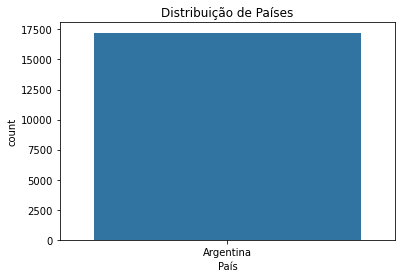

In [5]:
sns.countplot(data=df, x='country_name')
plt.title('Distribuição de Países')
plt.xlabel('País')
plt.show()

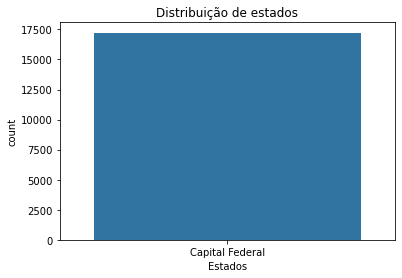

In [6]:
sns.countplot(data=df, x='state_name')
plt.title('Distribuição de estados')
plt.xlabel('Estados')
plt.show()

## Os dados das habitações estão concentrados em casas classificadas como "Apartamentos"

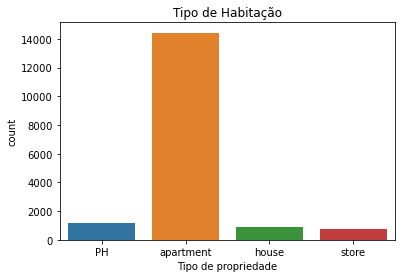

In [7]:
# grande parte dos imoveis estão concentrados em apartamentos
sns.countplot(data = df, x = 'property_type')
plt.title('Tipo de Habitação')
plt.xlabel('Tipo de propriedade')
plt.show()

In [189]:
df['place_name'].value_counts()

Palermo            1502
Belgrano           1496
Caballito          1389
Recoleta           1001
Flores              893
                   ... 
Parque Chas          15
Palermo Viejo        10
Villa Soldati         7
Villa Riachuelo       3
Catalinas             1
Name: place_name, Length: 62, dtype: int64

## Nota-se que os valores dos apartamentos contém diversos outliers.

### As observações consideradas outliers serão removidas.

## Remoção de Outliers - Coluna Tamanho da habitação

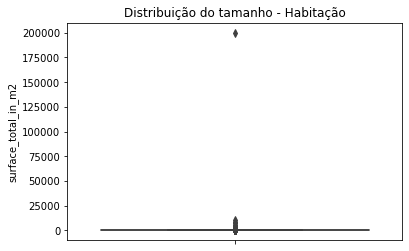

In [9]:
sns.boxplot(data = df, y='surface_total_in_m2')
plt.title('Distribuição do tamanho - Habitação')
plt.show()

In [12]:
q3, q1 = np.percentile(df['surface_total_in_m2'], [75, 25])

print(f"primeiro quartil: ", q1)
print(f"terceiro quartil: ", q3)

primeiro quartil:  41.0
terceiro quartil:  85.0


In [13]:
area75 = df[df['surface_total_in_m2'] > 78.0].index

df = df.drop(area75, inplace = False)

In [15]:
# retirar metragem = 0

zeros = df['surface_total_in_m2'] == 0
df = df[~zeros]

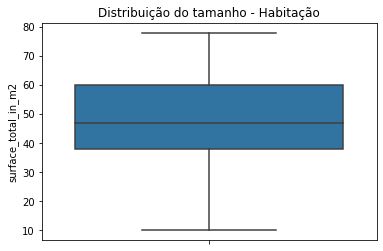

In [16]:
sns.boxplot(data = df, y='surface_total_in_m2')
plt.title('Distribuição do tamanho - Habitação')
plt.show()

## Remoção de Outliers - Coluna preço

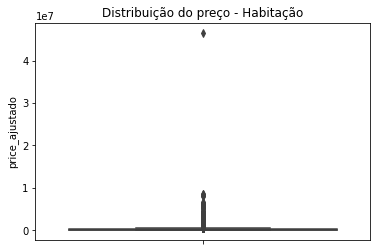

In [8]:
# distribuição do preço
sns.boxplot(data= df, y='price_ajustado')
plt.title('Distribuição do preço - Habitação')
plt.show()

In [192]:
q3, q1 = np.percentile(df['price_ajustado'], [75, 25])

print(f"primeiro quartil: ", q1)
print(f"terceiro quartil: ", q3)

primeiro quartil:  101100.0
terceiro quartil:  275000.0


In [10]:
indice75 = df[df['price_ajustado'] > 350000.0].index

df = df.drop(indice75, inplace = False)

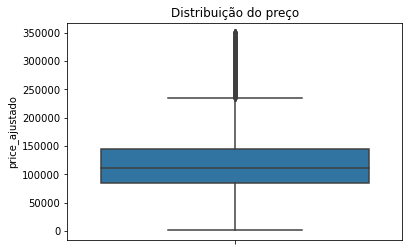

In [78]:
# distribuição do preço
sns.boxplot(data= df, y='price_ajustado')
plt.title('Distribuição do preço')
plt.show()

## Checando a distribuição de preço que foram tratadas manualmente

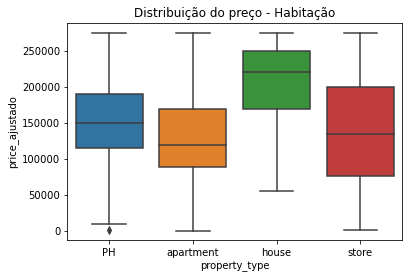

In [195]:
sns.boxplot(data = df,
            y = 'price_ajustado',
            x = 'property_type')
plt.title('Distribuição do preço - Habitação')
plt.show()

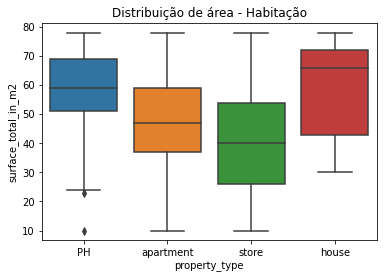

In [42]:
sns.boxplot(
    data = df,
    y = 'surface_total_in_m2',
    x = 'property_type'
)
plt.title('Distribuição de área - Habitação')
plt.show()

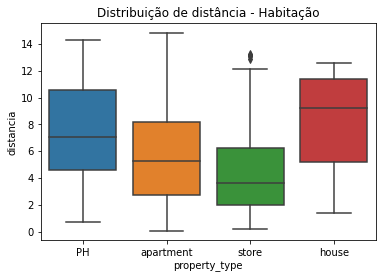

In [41]:
sns.boxplot(
    data = df,
    y = 'distancia',
    x = 'property_type'
)
plt.title('Distribuição de distância - Habitação')
plt.show()

## Checando a correlação das variáveis "área total da habitação em M2" e "preço convertido"

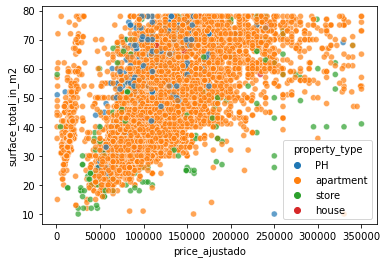

In [23]:
sns.scatterplot(
    data=df,
    y = 'surface_total_in_m2',
    x = 'price_ajustado',
    hue = 'property_type',
    alpha=0.7
)
plt.show()

## Calculando a distância de cada propriedade para o marco zero da argentina

### Removendo 1 outlier presente nos dados (ditância 630km do centro)

In [24]:
# calculando distancia para o centro

ponto_marcozero = (-34.609447506344914, -58.38743491792922)

In [25]:
for i in df.index:
    df.loc[i, 'distancia'] = geopy.distance.geodesic(ponto_marcozero,
                                                     (df.loc[i, 'geometry'].x,
                                                      df.loc[i, 'geometry'].y)
                                                     ).kilometers

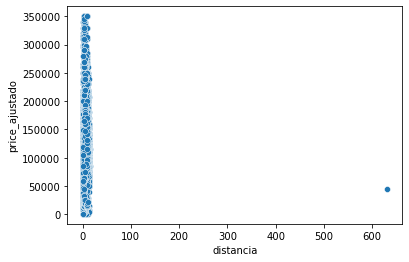

In [27]:
sns.scatterplot(
    data=df,
    y = 'price_ajustado',
    x = 'distancia'
)
plt.show()

In [28]:
df['distancia'].describe()

count    9946.000000
mean        5.655726
std         7.057906
min         0.074452
25%         2.714241
50%         5.288434
75%         8.244592
max       630.542367
Name: distancia, dtype: float64

In [29]:
_i = df[df['distancia'] > 600].index

df.drop(_i, inplace=True)

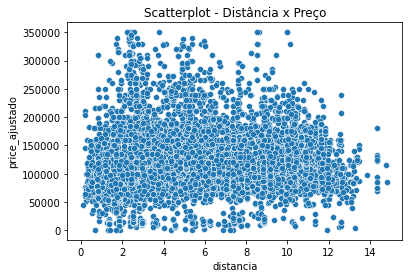

In [43]:
sns.scatterplot(
    data=df,
    y = 'price_ajustado',
    x = 'distancia'
)
plt.title('Scatterplot - Distância x Preço')
plt.show()

## Distribuição das distâncias por tipo de habitação

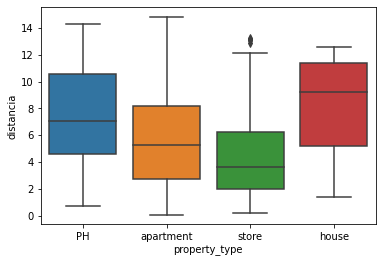

In [40]:
sns.boxplot(
    data = df,
    y = 'distancia',
    x = 'property_type'
)
plt.show()

## Calculando a correlação de todas as variáveis categóricas

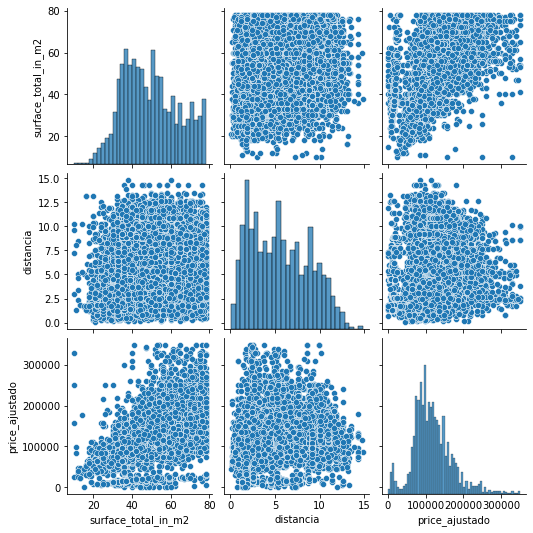

In [50]:
df_colunas = df[['surface_total_in_m2', 'distancia', 'price_ajustado']]

sns.pairplot(df_colunas)

plt.show()

## Selecionando colunas que serão utilizadas na criação do modelo.

In [206]:
df.columns

Index(['property_type', 'place_name', 'country_name', 'state_name', 'lat',
       'lon', 'price', 'currency', 'surface_total_in_m2', 'price_ajustado',
       'currency_ajustado', 'geometry', 'distancia'],
      dtype='object')

In [51]:
df_modelo = df[['surface_total_in_m2', 'price_ajustado']]

In [53]:
# separando os dados em treino e teste
df_treino, df_teste = train_test_split(df_modelo, test_size=0.3, random_state=13)

print(f'Número de observações em treino: {df_treino.shape[0]}')
print(f'Número de observações em teste: {df_teste.shape[0]}')


Número de observações em treino: 6961
Número de observações em teste: 2984


In [54]:
# criando variável para avaliar o modelo
model = LinearRegression()

In [55]:
# separando variaveis independentes das dependentes
X_train = df_treino[['surface_total_in_m2']]
Y_train = df_treino[['price_ajustado']]

In [56]:
# criando o modelo (fit do modelo)
model = LinearRegression().fit(X_train, Y_train)

In [57]:
# mensurando o R2 da equação
r2 = model.score(X_train,Y_train)
print(f'valor de R2: {r2}')

valor de R2: 0.3713361353222715


In [58]:
# separando variaveis independentes das dependentes para os dados de teste
x_test = df_teste[['surface_total_in_m2']]
y_test = df_teste[['price_ajustado']]

### Aplicando o predict do modelo

In [59]:
# predizendo respostas

y_pred = model.predict(x_test)

y_pred = pd.DataFrame(y_pred, columns=['predict'])

In [60]:
df_validacao = y_test.join(y_pred)

valor de R2: 0.3713361353222715


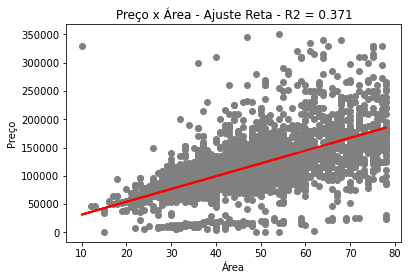

In [69]:
print(f'valor de R2: {r2}')
plt.scatter(x_test, y_test, color = 'gray')
plt.plot(x_test, y_pred, color = 'red', linewidth = 2)
plt.title(f'Preço x Área - Ajuste Reta - R2 = {r2.round(3)}')
plt.xlabel('Área')
plt.ylabel('Preço')
plt.show()

In [65]:
#b0 e b1
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: [8935.18299309]
slope: [[2259.37102456]]


In [79]:
# top 5 bairros com maior média de preço preço

df[['place_name', 'price_ajustado']].groupby('place_name').mean('price_ajustado').sort_values(by = 'price_ajustado', ascending = False).round(2).head(5)

,price_ajustado
place_name,
Puerto Madero,276648.98
Palermo Chico,183826.63
Las Cañitas,154671.67
Nuñez,154397.00
Palermo,150974.94


In [80]:
erro_medio = metrics.mean_absolute_error(y_test, y_pred)

In [83]:
print(erro_medio.round(2))

29355.84
